## Vector Autoregression

Multivariate timeseries models to learn from parallel timeseries. 

In [143]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.vector_ar.vecm import coint_johansen

# misc
import warnings
warnings.filterwarnings("ignore")

In [12]:
# Read the wide data 
all_wide_data = pd.read_csv('df_final_date_wide_2007.csv')
all_wide_data.shape

(65363, 40)

In [13]:
def adjust(val, length= 6): return str(val).ljust(length)

In [14]:
# Fix ags 5
def fix_ags5(x):
    """Function to fix the format of ag5 """
    if len(str(x))==4:
        return '0'+str(x)
    else:
        return str(x)
all_wide_data['ags5'] = all_wide_data['ags5'].apply(fix_ags5)

In [15]:
all_wide_data.head(10)

,ags2,ags5,date,number_of_company_deletions,number_of_company_liquidations,number_of_start_ups,number_of_companies_administration,number_of_companies_agriculture,number_of_companies_arts_entertainment,number_of_companies_communication,...,realized_short_time_work_companies,realized_short_time_work_people,underemployment_without_short_time _work,unemployment_benefit_entitled,unemployment_benefit_recipients,unemployment_rate,registerd_jobs,unemployed,employees_social_security_at_work,employees_social_security_at_residence
0,1,01001,5/1/2007,4,2,21,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,12.7,784,5559,38319,24519
1,1,01001,6/1/2007,8,6,18,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,12.2,932,5323,38266,24560
2,1,01001,7/1/2007,9,0,18,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,12.5,862,5454,38237,24561
3,1,01001,8/1/2007,6,4,10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,12.3,819,5377,38833,24936
4,1,01001,9/1/2007,11,4,6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,11.7,725,5132,38840,25072
5,1,01001,10/1/2007,9,2,14,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,11.2,745,4911,38688,25195
6,1,01001,11/1/2007,10,5,17,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.8,680,4739,38748,25251
7,1,01001,12/1/2007,5,3,14,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.7,631,4697,38510,25032
8,1,01001,1/1/2008,10,13,13,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,11.6,539,5057,38051,24779
9,1,01001,2/1/2008,13,3,11,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,11.5,584,5045,38026,24809


In [16]:
# Filter by kreis 
time_series_data_kreis = all_wide_data[all_wide_data['ags5'] == '01001']
time_series_data_kreis.shape

(163, 40)

In [17]:
time_series_data_kreis.head()

,ags2,ags5,date,number_of_company_deletions,number_of_company_liquidations,number_of_start_ups,number_of_companies_administration,number_of_companies_agriculture,number_of_companies_arts_entertainment,number_of_companies_communication,...,realized_short_time_work_companies,realized_short_time_work_people,underemployment_without_short_time _work,unemployment_benefit_entitled,unemployment_benefit_recipients,unemployment_rate,registerd_jobs,unemployed,employees_social_security_at_work,employees_social_security_at_residence
0,1,01001,5/1/2007,4,2,21,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,12.7,784,5559,38319,24519
1,1,01001,6/1/2007,8,6,18,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,12.2,932,5323,38266,24560
2,1,01001,7/1/2007,9,0,18,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,12.5,862,5454,38237,24561
3,1,01001,8/1/2007,6,4,10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,12.3,819,5377,38833,24936
4,1,01001,9/1/2007,11,4,6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,11.7,725,5132,38840,25072


In [18]:
# Convert date format
time_series_data_kreis['date'] = pd.to_datetime(time_series_data_kreis['date'])

<ipython-input-18-c48a25054cec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_data_kreis['date'] = pd.to_datetime(time_series_data_kreis['date'])


In [19]:
# Clip the data before 2010 and after 2019 
start_date = '2010-01-01'
end_date = '2020-01-01'
mask = (time_series_data_kreis['date'] >= start_date) & (time_series_data_kreis['date'] < end_date)
useful_data = time_series_data_kreis[(mask)]

In [20]:
# Set the date as the index
useful_data.set_index('date', inplace=True)

In [21]:
useful_data.isnull().sum()

ags2                                                0
ags5                                                0
number_of_company_deletions                         0
number_of_company_liquidations                      0
number_of_start_ups                                 0
number_of_companies_administration                108
number_of_companies_agriculture                   108
number_of_companies_arts_entertainment            108
number_of_companies_communication                 108
number_of_companies_construction                  108
number_of_companies_domestic_staff                108
number_of_companies_economic_services             108
number_of_companies_education                     108
number_of_companies_energy                        108
number_of_companies_extraterritorial              108
number_of_companies_financial_and_insurance       108
number_of_companies_health_and_social_services    108
number_of_companies_hospitality                   108
number_of_companies_manufact

In [22]:
to_be_dropped = [
    'ags2',
#     'unemployment_benefit_entitled', 
#     'unemployment_benefit_recipients',
#     'registerd_jobs', 
#     'unemployed',
    
]

In [23]:
useful_data = useful_data.drop(to_be_dropped, axis=1)
useful_data

,ags5,number_of_company_deletions,number_of_company_liquidations,number_of_start_ups,number_of_companies_administration,number_of_companies_agriculture,number_of_companies_arts_entertainment,number_of_companies_communication,number_of_companies_construction,number_of_companies_domestic_staff,...,realized_short_time_work_companies,realized_short_time_work_people,underemployment_without_short_time _work,unemployment_benefit_entitled,unemployment_benefit_recipients,unemployment_rate,registerd_jobs,unemployed,employees_social_security_at_work,employees_social_security_at_residence
date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,01001,14,8,9,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,13.7,436,5874,37563,24746
2010-02-01,01001,12,2,8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,14.1,459,6043,37553,24702
2010-03-01,01001,7,6,14,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,13.6,407,5816,37707,24903
2010-04-01,01001,11,12,15,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,13.1,435,5624,37873,25125
2010-05-01,01001,15,5,10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,12.5,438,5431,37947,25228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-01,01001,10,5,10,44.0,12.0,147.0,154.0,244.0,0.0,...,NaN,NaN,6098.0,11278.0,1155.0,8.3,816,4382,44967,32765
2019-09-01,01001,6,6,8,39.0,11.0,125.0,142.0,233.0,0.0,...,NaN,NaN,6061.0,11195.0,1146.0,8.3,851,4359,45206,33130
2019-10-01,01001,4,2,13,39.0,11.0,126.0,145.0,234.0,0.0,...,NaN,NaN,5941.0,11112.0,1056.0,8.1,814,4228,45259,33172


In [24]:
print(len(useful_data.columns))
useful_data.columns

38


Index(['ags5', 'number_of_company_deletions', 'number_of_company_liquidations',
       'number_of_start_ups', 'number_of_companies_administration',
       'number_of_companies_agriculture',
       'number_of_companies_arts_entertainment',
       'number_of_companies_communication', 'number_of_companies_construction',
       'number_of_companies_domestic_staff',
       'number_of_companies_economic_services',
       'number_of_companies_education', 'number_of_companies_energy',
       'number_of_companies_extraterritorial',
       'number_of_companies_financial_and_insurance',
       'number_of_companies_health_and_social_services',
       'number_of_companies_hospitality', 'number_of_companies_manufacturing',
       'number_of_companies_mining', 'number_of_companies_real_estat',
       'number_of_companies_rendering_other_services',
       'number_of_companies_repair_motor_vehicles',
       'number_of_companies_technical_services',
       'number_of_companies_transport', 'number_of_com

In [25]:
# Drop irrelevant columns
print("Columns before:", useful_data.shape[1])
useful_data.dropna(axis=1, inplace=True)
print("Columns after:", useful_data.shape[1])

Columns before: 38
Columns after: 9


In [26]:
current_ags = useful_data['ags5'][0]
useful_data.drop(['ags5'], axis=1, inplace=True)
useful_data.shape

(120, 8)

In [27]:
useful_data.head()

,number_of_company_deletions,number_of_company_liquidations,number_of_start_ups,unemployment_rate,registerd_jobs,unemployed,employees_social_security_at_work,employees_social_security_at_residence
date,,,,,,,,
2010-01-01,14,8,9,13.7,436,5874,37563,24746
2010-02-01,12,2,8,14.1,459,6043,37553,24702
2010-03-01,7,6,14,13.6,407,5816,37707,24903
2010-04-01,11,12,15,13.1,435,5624,37873,25125
2010-05-01,15,5,10,12.5,438,5431,37947,25228


### Visualise the time series

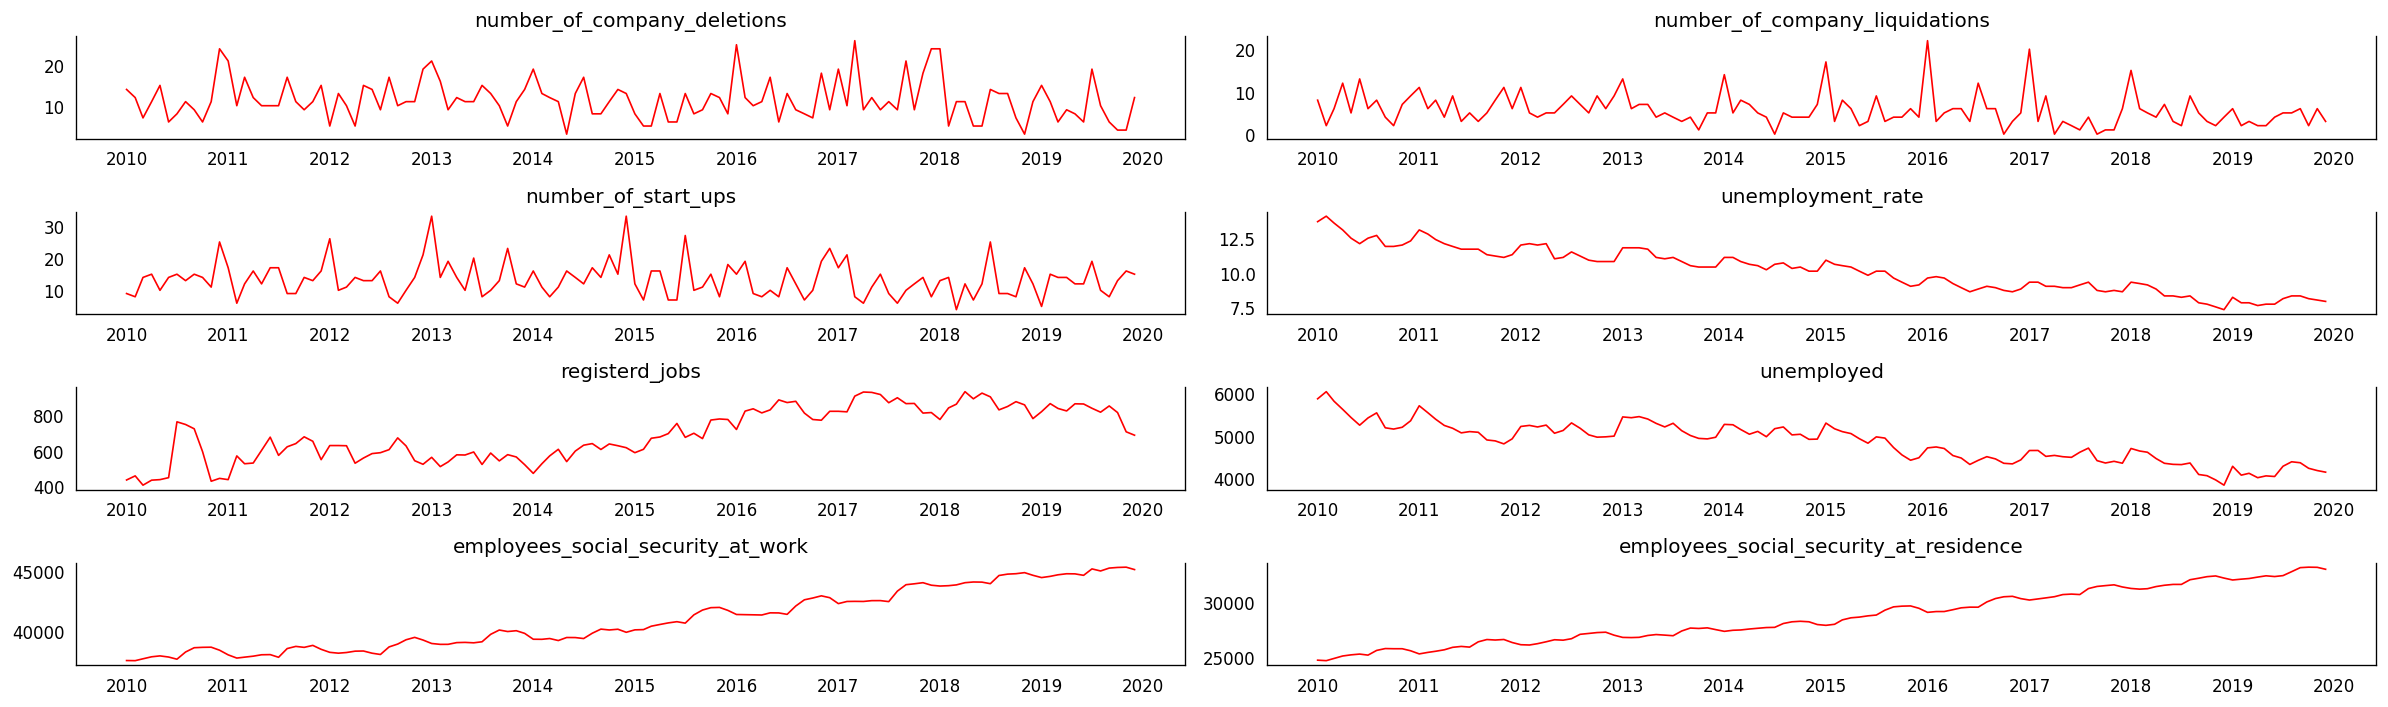

In [28]:
rows = int(useful_data.shape[1]/2)
fig, axes = plt.subplots(nrows=rows, ncols=2, dpi=120, figsize=(20, 6))

for i, ax in enumerate(axes.flatten()):
    viz_df = useful_data
    data = viz_df[viz_df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    
    # Decorations
    ax.set_title(viz_df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=10)

plt.tight_layout();

### CausalityTest

Using Granger’s Causality Test, it’s possible to test this relationship before even building the model.

So what does Granger’s Causality really test?

Granger’s causality tests the null hypothesis that the coefficients of past values in the regression equation is zero.

In simpler terms, the past values of time series (X) do not cause the other series (Y). So, if the p-value obtained from the test is lesser than the significance level of 0.05, then, you can safely reject the null hypothesis.

The below code implements the Granger’s Causality test for all possible combinations of the time series in a given dataframe and stores the p-values of each combination in the output matrix.

Here col_x cause row_y and the matrix shows the p-value of the dataset. 

In [29]:
# Testing Causation using Granger’s Causality Test
maxlag=12
test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    
    return df

grangers_causation_matrix(useful_data, variables = useful_data.columns) 

,number_of_company_deletions_x,number_of_company_liquidations_x,number_of_start_ups_x,unemployment_rate_x,registerd_jobs_x,unemployed_x,employees_social_security_at_work_x,employees_social_security_at_residence_x
number_of_company_deletions_y,1.0000,0.0096,0.0403,0.0219,0.0057,0.0548,0.0000,0.0002
number_of_company_liquidations_y,0.1136,1.0000,0.0009,0.0000,0.0013,0.0000,0.0000,0.0000
number_of_start_ups_y,0.2741,0.0031,1.0000,0.0001,0.0000,0.0005,0.0000,0.0001
unemployment_rate_y,0.0099,0.0015,0.0001,1.0000,0.0032,0.0000,0.0000,0.0000
registerd_jobs_y,0.0084,0.0055,0.0042,0.0243,1.0000,0.1110,0.0003,0.0061
unemployed_y,0.0176,0.0000,0.0001,0.0000,0.0000,1.0000,0.0000,0.0000
employees_social_security_at_work_y,0.0123,0.0000,0.0011,0.0000,0.0003,0.0000,1.0000,0.0000
employees_social_security_at_residence_y,0.0001,0.0000,0.0467,0.0000,0.0040,0.0000,0.0007,1.0000


### Co-integration test

Cointegration test helps to establish the presence of a statistically significant connection between two or more time series.

In [30]:
def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(useful_data)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
number_of_company_deletions ::  204.64    > 143.6691  =>   True
number_of_company_liquidations ::  140.39    > 111.7797  =>   True
number_of_start_ups ::  86.77     > 83.9383   =>   True
unemployment_rate ::  52.33     > 60.0627   =>   False
registerd_jobs ::  29.24     > 40.1749   =>   False
unemployed ::  15.56     > 24.2761   =>   False
employees_social_security_at_work ::  4.18      > 12.3212   =>   False
employees_social_security_at_residence ::  0.78      > 4.1296    =>   False


## Modelling Section

In [31]:
# Perform a train test split
n_obs = 12
df_train, df_test = useful_data[0:-n_obs], useful_data[-n_obs:]

# Check size
print(df_train.shape)
print(df_test.shape)  # last 12 values

(108, 8)
(12, 8)


### Stationarity Test

Since the VAR model requires the time series you want to forecast to be stationary, it is customary to check all the time series in the system for stationarity.

In [32]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")   

In [33]:
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "number_of_company_deletions" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.9571
 No. Lags Chosen       = 5
 Critical value 1%     = -3.496
 Critical value 5%     = -2.89
 Critical value 10%    = -2.582
 => P-Value = 0.0017. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "number_of_company_liquidations" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.7613
 No. Lags Chosen       = 11
 Critical value 1%     = -3.5
 Critical value 5%     = -2.892
 Critical value 10%    = -2.583
 => P-Value = 0.3998. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "number_of_start_ups" 
    ------------------------------------------

In [34]:
# Differentiate the data
df_differenced = df_train.diff().dropna()
df_differenced

,number_of_company_deletions,number_of_company_liquidations,number_of_start_ups,unemployment_rate,registerd_jobs,unemployed,employees_social_security_at_work,employees_social_security_at_residence
date,,,,,,,,
2010-02-01,-2.0,-6.0,-1.0,0.4,23.0,169.0,-10.0,-44.0
2010-03-01,-5.0,4.0,6.0,-0.5,-52.0,-227.0,154.0,201.0
2010-04-01,4.0,6.0,1.0,-0.5,28.0,-192.0,166.0,222.0
2010-05-01,4.0,-7.0,-5.0,-0.6,3.0,-193.0,74.0,103.0
2010-06-01,-9.0,8.0,4.0,-0.4,11.0,-182.0,-94.0,70.0
...,...,...,...,...,...,...,...,...
2018-08-01,-1.0,7.0,-16.0,0.1,-73.0,38.0,677.0,424.0
2018-09-01,0.0,-4.0,0.0,-0.5,19.0,-272.0,114.0,135.0
2018-10-01,-6.0,-2.0,-1.0,-0.1,27.0,-29.0,34.0,142.0


In [35]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "number_of_company_deletions" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.7313
 No. Lags Chosen       = 6
 Critical value 1%     = -3.498
 Critical value 5%     = -2.891
 Critical value 10%    = -2.582
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "number_of_company_liquidations" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.6687
 No. Lags Chosen       = 10
 Critical value 1%     = -3.5
 Critical value 5%     = -2.892
 Critical value 10%    = -2.583
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "number_of_start_ups" 
    -----------------------------------------------
 Null Hypothesis: Dat

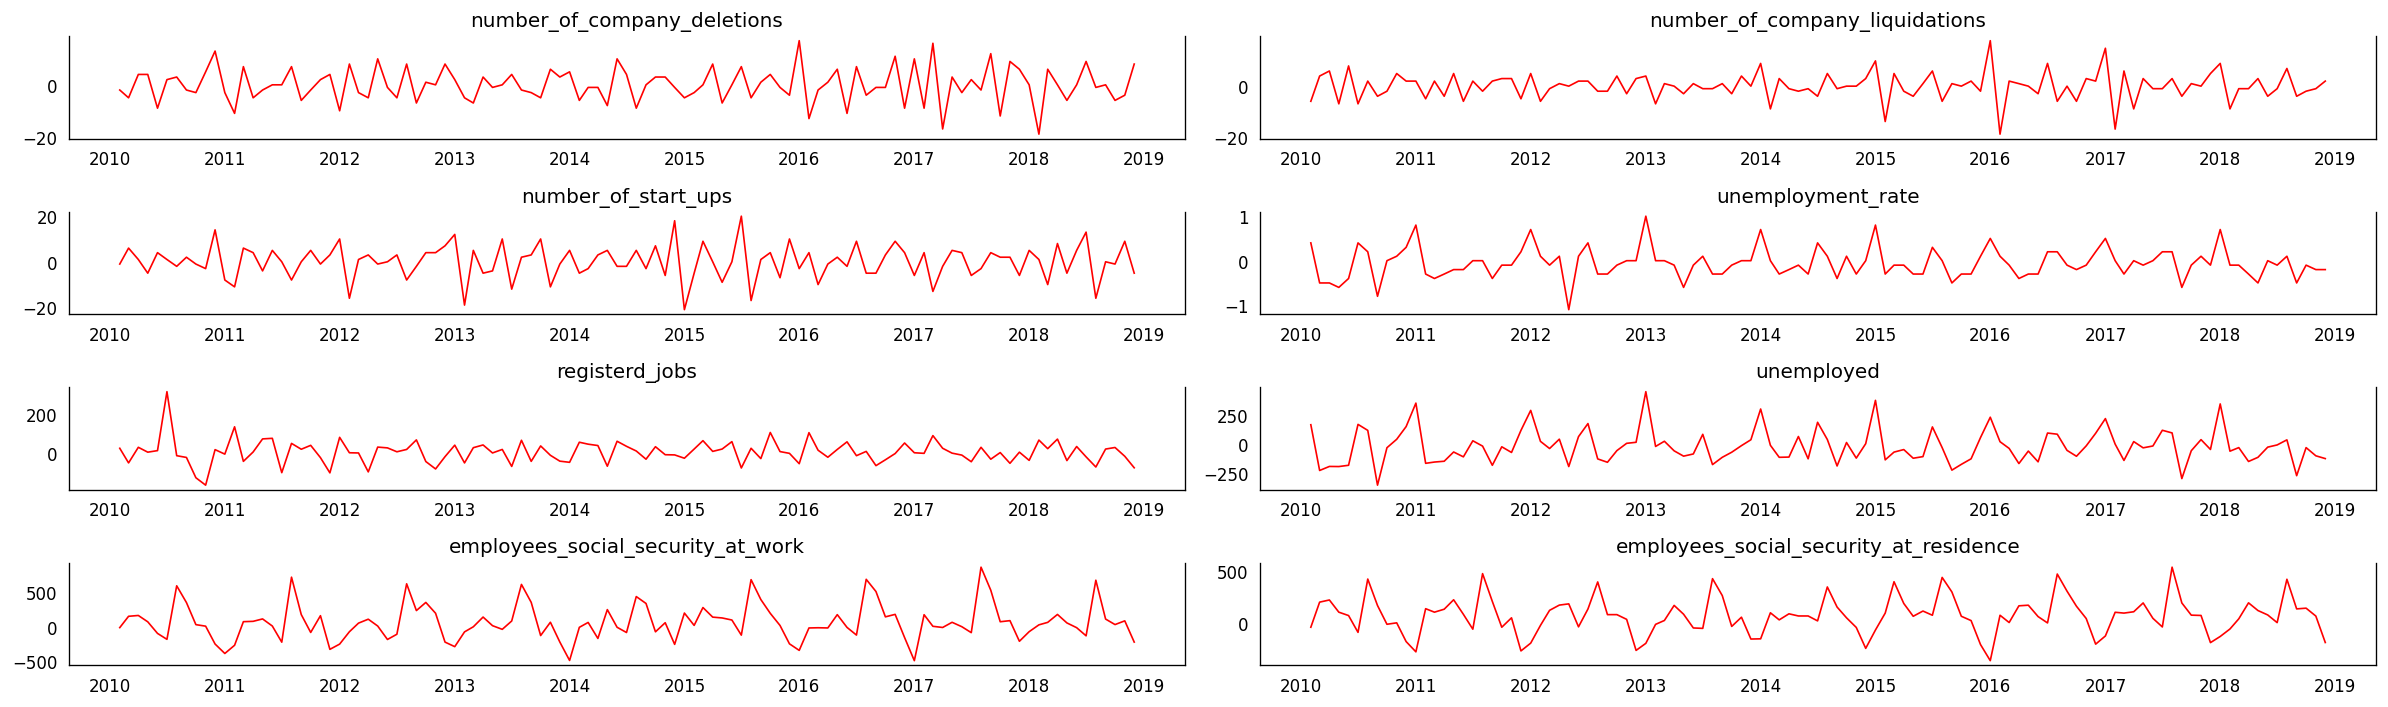

In [36]:
rows = int(useful_data.shape[1]/2)
fig, axes = plt.subplots(nrows=rows, ncols=2, dpi=120, figsize=(20, 6))

for i, ax in enumerate(axes.flatten()):
    viz_df = df_differenced
    data = viz_df[viz_df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    
    # Decorations
    ax.set_title(viz_df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=10)

plt.tight_layout();

In [37]:
# Second Differencing
df_differenced = df_differenced.diff().dropna()

In [38]:
# ADF Test on each column of 2nd Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "number_of_company_deletions" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.5482
 No. Lags Chosen       = 12
 Critical value 1%     = -3.503
 Critical value 5%     = -2.893
 Critical value 10%    = -2.584
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "number_of_company_liquidations" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.8884
 No. Lags Chosen       = 12
 Critical value 1%     = -3.503
 Critical value 5%     = -2.893
 Critical value 10%    = -2.584
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "number_of_start_ups" 
    -----------------------------------------------
 Null Hypothesis: 

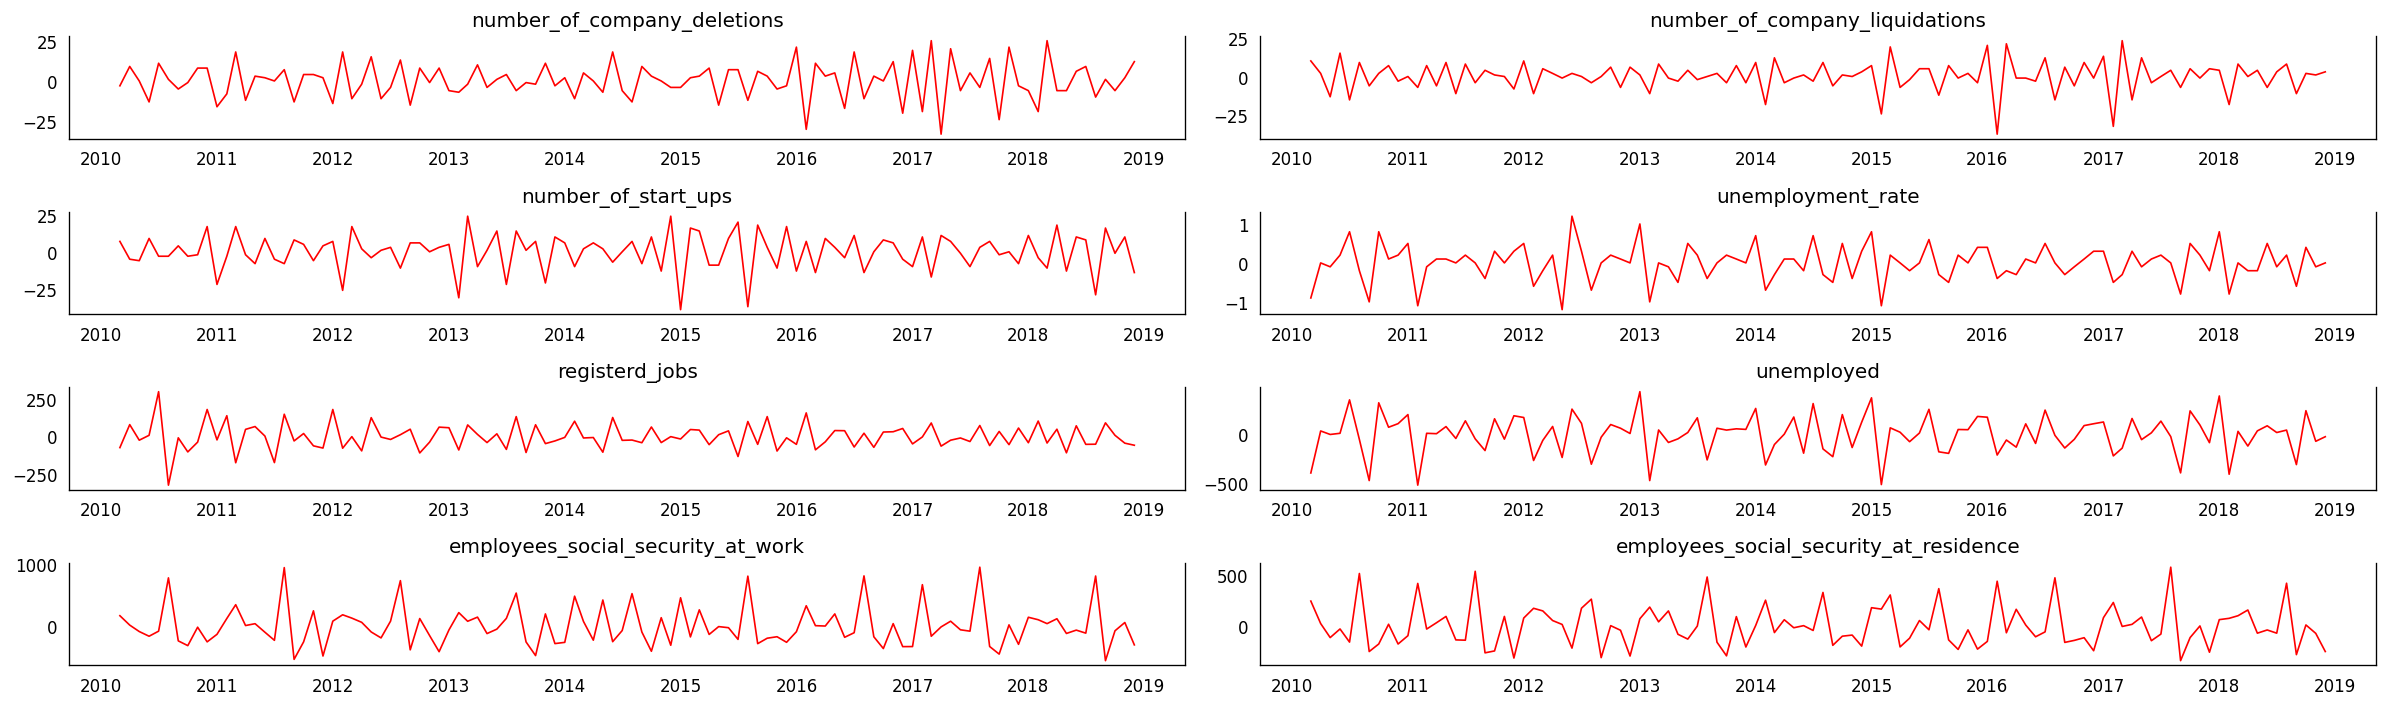

In [39]:
rows = int(useful_data.shape[1]/2)
fig, axes = plt.subplots(nrows=rows, ncols=2, dpi=120, figsize=(20, 6))

for i, ax in enumerate(axes.flatten()):
    viz_df = df_differenced
    data = viz_df[viz_df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    
    # Decorations
    ax.set_title(viz_df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=10)

plt.tight_layout();

### Check model parameters

In [40]:
model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  47.15324542178365
BIC :  48.97310394760595
FPE :  3.0189740221080686e+20
HQIC:  47.89068799822879 

Lag Order = 2
AIC :  46.40837308685336
BIC :  49.86642272419208
FPE :  1.4627906671200254e+20
HQIC:  47.80933061992958 

Lag Order = 3
AIC :  45.57901896031115
BIC :  50.69499757823278
FPE :  6.7461943482727514e+19
HQIC:  47.65116547134794 

Lag Order = 4
AIC :  44.87097563318769
BIC :  51.66502291462933
FPE :  3.7237620789319066e+19
HQIC:  47.62211700736245 

Lag Order = 5
AIC :  43.79020552435535
BIC :  52.282874133503206
FPE :  1.5494487392129597e+19
HQIC:  47.228281920817025 

Lag Order = 6
AIC :  42.90215115792839
BIC :  53.1144182870017
FPE :  8.958339353558512e+18
HQIC:  47.03523942426233 

Lag Order = 7
AIC :  41.63494943055231
BIC :  53.58822874026315
FPE :  4.3657397860333916e+18
HQIC:  46.4712655157461 

Lag Order = 8
AIC :  40.467786772553126
BIC :  54.18394074100922
FPE :  3.277075193943552e+18
HQIC:  46.015688131815836 

Lag Order = 9
AIC :  38.29837437

c:\users\91981\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [41]:
x = model.select_order(maxlags=10)
x.summary()

,AIC,BIC,FPE,HQIC
0,49.87,50.08,4.550e+21,49.96
1,46.63,48.55*,1.791e+20,47.41
2,45.74,49.37,7.541e+19,47.21
3,44.44,49.78,2.207e+19,46.60
4,43.90,50.95,1.471e+19,46.75
5,43.33,52.09,1.051e+19,46.87
6,42.45,52.93,6.388e+18,46.69
7,41.13,53.31,3.072e+18,46.06
8,40.02,53.91,2.501e+18,45.63
9,38.16,53.76,1.652e+18,44.47


In [42]:
# Train the model
lag = 3
model_fitted = model.fit(lag)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 07, Jul, 2021
Time:                     16:24:33
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                    50.6950
Nobs:                     103.000    HQIC:                   47.6512
Log likelihood:          -3316.52    FPE:                6.74619e+19
AIC:                      45.5790    Det(Omega_mle):     1.18598e+19
--------------------------------------------------------------------
Results for equation number_of_company_deletions
                                               coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------------------------
const                                            -0.122388         0.616439           -0.199           0.843
L1.number_of_company_deletions     

In [43]:
# Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(useful_data.columns, out):
    print(adjust(col), ':', round(val, 2))

number_of_company_deletions : 2.09
number_of_company_liquidations : 2.25
number_of_start_ups : 2.38
unemployment_rate : 2.06
registerd_jobs : 2.17
unemployed : 2.14
employees_social_security_at_work : 2.2
employees_social_security_at_residence : 2.27


### Forecasting

In [44]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order) 

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

3


array([[-6.00e+00,  2.00e+00, -1.00e+00,  4.00e-01,  8.00e+00,  2.43e+02,
        -8.00e+01,  7.00e+00],
       [ 2.00e+00,  1.00e+00,  1.00e+01, -1.00e-01, -4.50e+01, -7.10e+01,
         5.40e+01, -7.70e+01],
       [ 1.20e+01,  3.00e+00, -1.40e+01,  0.00e+00, -5.90e+01, -2.40e+01,
        -3.08e+02, -2.58e+02]])

In [45]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=n_obs)
df_forecast = pd.DataFrame(fc, index=useful_data.index[-n_obs:], columns=useful_data.columns + '_diff')
df_forecast

,number_of_company_deletions_diff,number_of_company_liquidations_diff,number_of_start_ups_diff,unemployment_rate_diff,registerd_jobs_diff,unemployed_diff,employees_social_security_at_work_diff,employees_social_security_at_residence_diff
date,,,,,,,,
2019-01-01,-15.474979,-5.908354,6.699218,0.503602,54.415753,218.974581,175.263273,158.591254
2019-02-01,7.965256,6.945707,-1.425489,-0.248513,-9.249204,-96.521737,-22.086022,-30.125551
2019-03-01,-1.463518,-6.161063,0.596113,-0.091781,28.162666,-25.780179,-145.787002,-53.747388
2019-04-01,-0.549651,2.509714,-2.862312,0.205502,-35.060086,54.922781,167.276897,85.047036
2019-05-01,-1.337296,-0.263947,3.445283,-0.174128,5.740162,-63.668271,-31.096154,-17.729640
2019-06-01,4.346051,0.950804,-2.264761,0.044117,9.057969,32.395391,9.343747,-5.714367
2019-07-01,-5.581922,-2.581650,1.462620,0.005929,-4.039194,-11.649525,-56.113738,-28.098033
2019-08-01,3.909644,3.435628,-0.365454,0.069701,-5.209731,34.348992,-19.814110,-10.294109
2019-09-01,-1.399549,-3.083831,-0.485045,-0.031041,6.465665,-18.754350,80.393278,42.447514


In [46]:
# Invert the transformation to get the real forecast
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_diff'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_diff'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_diff'].cumsum()
    return df_fc

In [47]:
df_results = invert_transformation(df_train, df_forecast, second_diff=False)
final_results = df_results.filter(regex='_forecast')

<AxesSubplot:xlabel='date'>

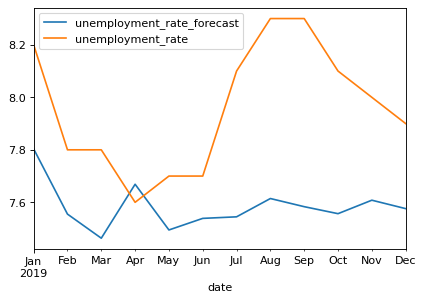

In [48]:
# Plot unemployment rate
fig, axes = plt.subplots(nrows=1, ncols=1, dpi=80, figsize=(6, 4))
df_results['unemployment_rate_forecast'].plot(legend=True, ax=axes).autoscale(axis='x',tight=True)
df_test['unemployment_rate'].plot(legend=True, ax=axes)



In [49]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mse = mean_squared_error(forecast, actual, squared=True)
    rmse = mean_squared_error(forecast, actual, squared=False)
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mse':mse, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

print('\nForecast Accuracy of: unemployment_rate')
accuracy_prod = forecast_accuracy(df_results['unemployment_rate_forecast'].values, df_test['unemployment_rate'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))


Forecast Accuracy of: unemployment_rate
mape   :  0.0478
me     :  -0.3744
mse    :  0.1874
mae    :  0.3858
mpe    :  -0.0463
rmse   :  0.4329
corr   :  0.3555
minmax :  0.0478


<ipython-input-49-7d728b9acbfe>:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
<ipython-input-49-7d728b9acbfe>:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)


In [50]:
useful_data.columns

Index(['number_of_company_deletions', 'number_of_company_liquidations',
       'number_of_start_ups', 'unemployment_rate', 'registerd_jobs',
       'unemployed', 'employees_social_security_at_work',
       'employees_social_security_at_residence'],
      dtype='object')

## Cluster based Vector autoregression models

### First Cluster: Bundesland

In [52]:
# Make a list of ags 2 
ags2_list = all_wide_data['ags2']

0         1
1         1
2         1
3         1
4         1
         ..
65358    16
65359    16
65360    16
65361    16
65362    16
Name: ags2, Length: 65363, dtype: int64

In [98]:
# Fix ags2 
current_ags2 = 1

# Get all kreis in the clusters
cluster_data = all_wide_data[all_wide_data['ags2'] == current_ags2]

''' Create a dataframe of the unemployment rate '''
kreis_list = list(cluster_data['ags5'].unique())
unemployment_rate_df = cluster_data[cluster_data['ags5']==kreis_list[0]][['date']].reset_index(drop=True) # start with the date column

# Iterate through the kreis
for kreis in kreis_list:
    filter_data = cluster_data[cluster_data['ags5'] == kreis].reset_index()
    col_name = kreis + '_unemployment_rate'
    unemployment_rate_df[col_name] = filter_data['unemployment_rate']

# Convert date format 
unemployment_rate_df['date'] = pd.to_datetime(unemployment_rate_df['date'])

In [99]:
unemployment_rate_df

,date,01001_unemployment_rate,01002_unemployment_rate,01003_unemployment_rate,01004_unemployment_rate,01051_unemployment_rate,01053_unemployment_rate,01054_unemployment_rate,01055_unemployment_rate,01056_unemployment_rate,01057_unemployment_rate,01058_unemployment_rate,01059_unemployment_rate,01060_unemployment_rate,01061_unemployment_rate,01062_unemployment_rate
0,2007-05-01,12.7,12.4,12.8,11.1,9.9,7.2,8.3,8.2,6.9,7.7,6.7,9.9,6.0,7.8,4.9
1,2007-06-01,12.2,12.1,12.7,11.2,9.5,6.9,7.9,7.9,6.6,7.4,6.4,9.4,5.9,7.6,4.7
2,2007-07-01,12.5,12.5,12.9,11.6,9.7,7.0,7.9,8.1,6.6,7.6,6.5,9.6,6.1,7.6,4.8
3,2007-08-01,12.3,12.8,12.9,11.5,9.7,7.1,7.9,8.1,6.6,7.7,6.3,9.4,5.9,7.3,4.6
4,2007-09-01,11.7,12.1,12.7,10.9,9.0,6.7,7.2,7.8,6.1,7.2,5.7,9.1,5.5,6.9,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,2020-07-01,10.0,9.2,8.7,9.5,6.3,5.9,5.2,5.4,5.9,5.2,4.9,5.6,5.5,6.3,4.2
159,2020-08-01,9.6,9.2,8.6,9.4,6.2,5.9,5.0,5.3,5.8,5.1,4.8,5.7,5.4,6.3,4.2
160,2020-09-01,9.1,8.9,8.3,9.3,5.8,5.7,4.8,5.0,5.6,4.9,4.7,5.4,5.2,6.0,4.0
161,2020-10-01,8.7,8.7,8.2,9.2,5.7,5.6,4.6,4.9,5.6,4.7,4.6,5.4,5.2,5.9,4.0


In [104]:
# Clip the data before 2010 and after 2019 
start_date = '2010-01-01'
end_date = '2020-01-01'
mask = (unemployment_rate_df['date'] >= start_date) & (unemployment_rate_df['date'] < end_date)
input_df = unemployment_rate_df[(mask)]

input_df.set_index('date', inplace=True)

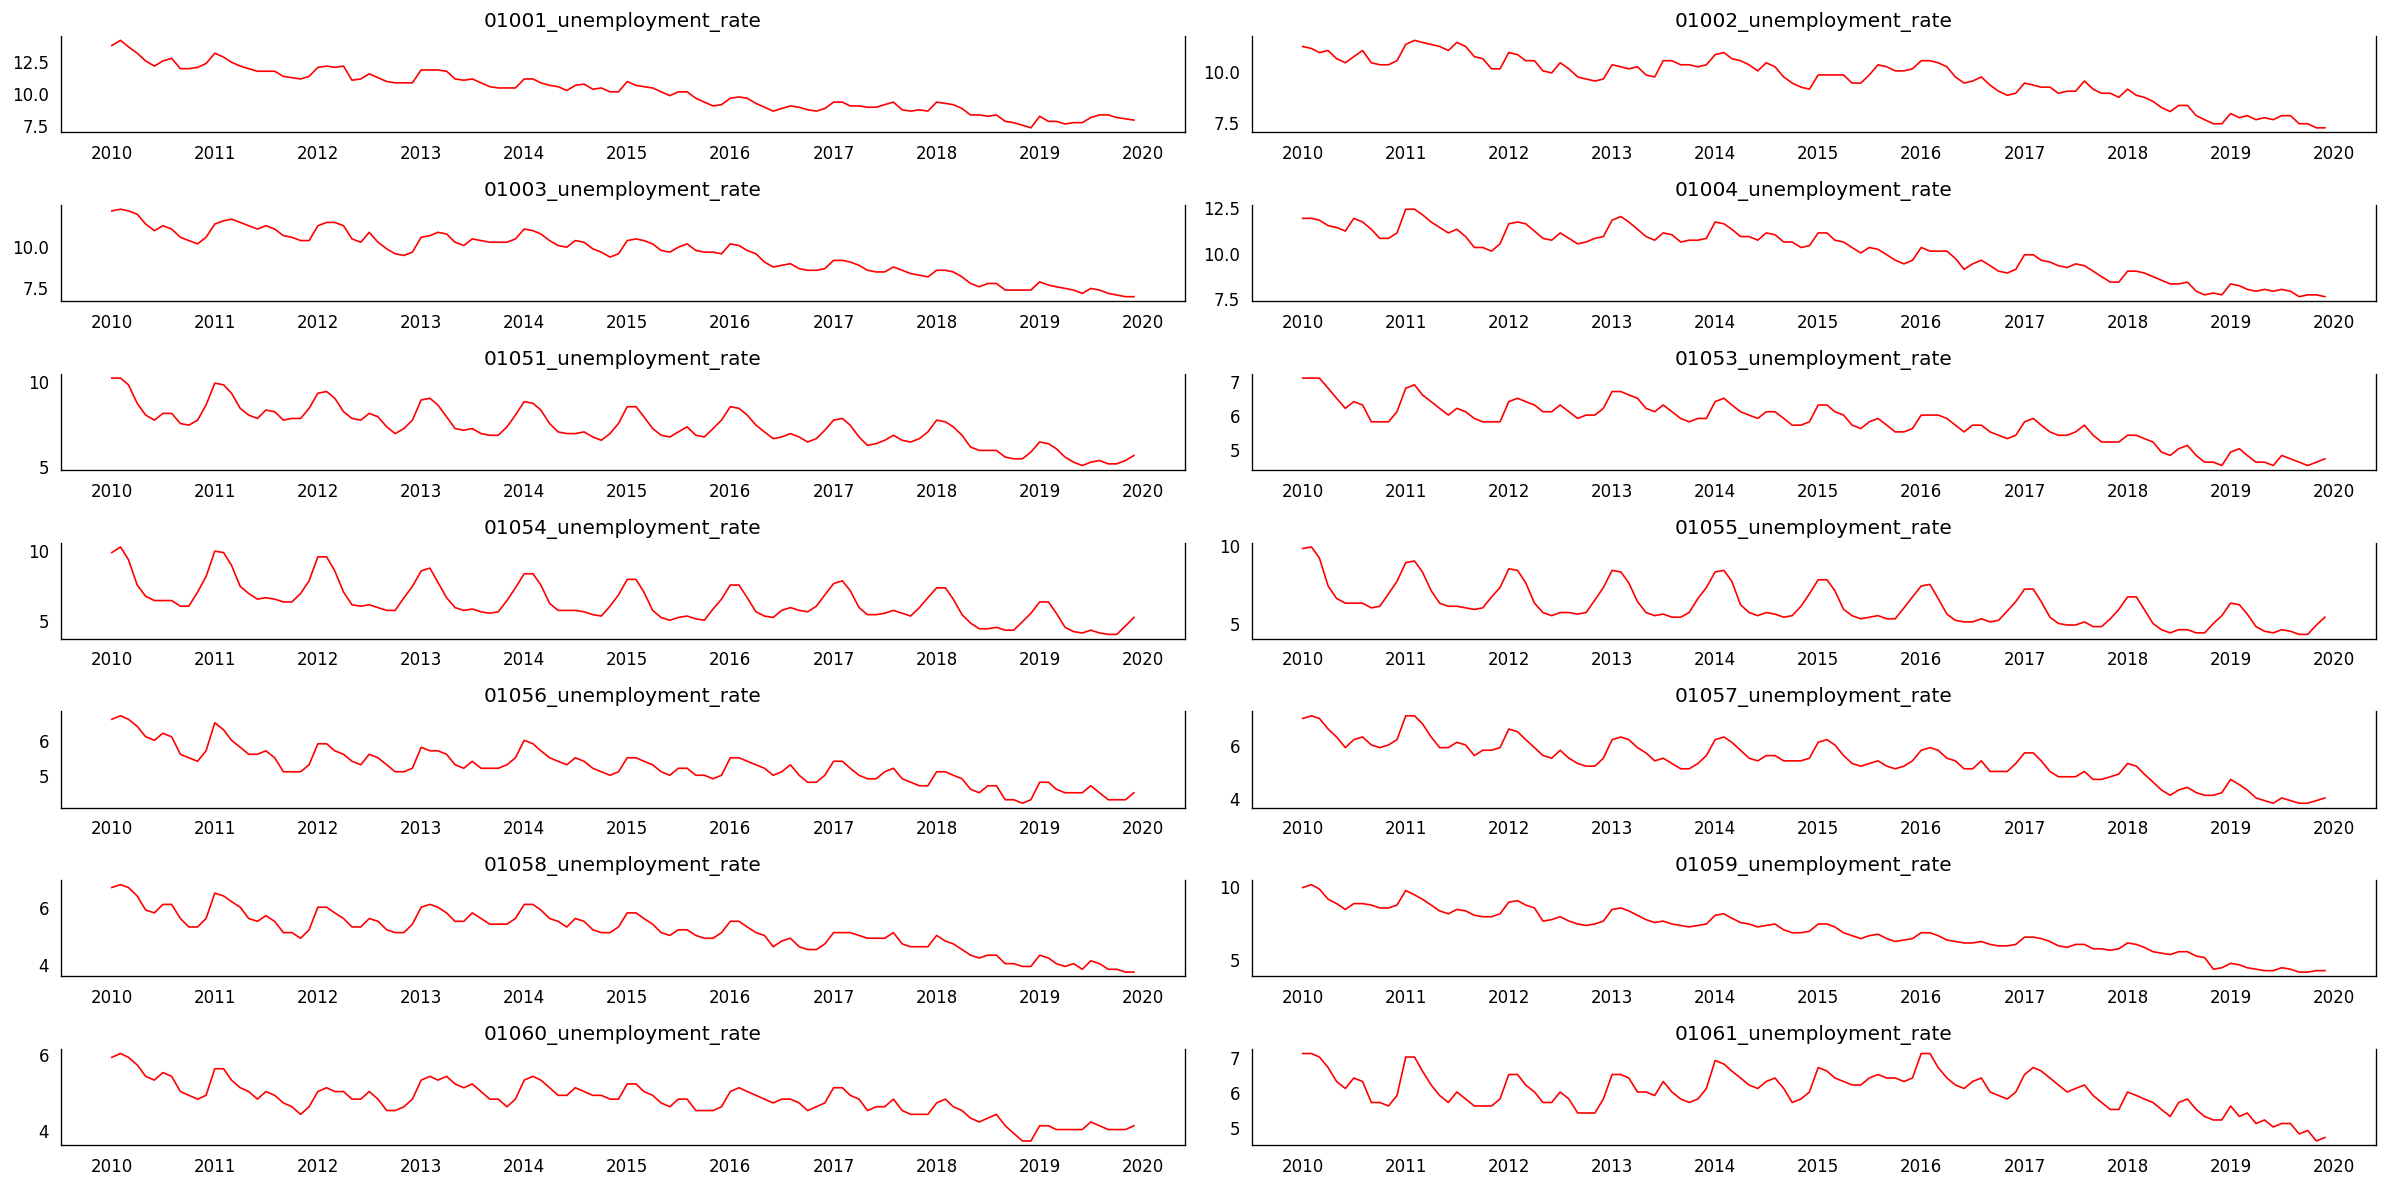

In [106]:
rows = int(input_df.shape[1]/2)
fig, axes = plt.subplots(nrows=rows, ncols=2, dpi=120, figsize=(20, 10))

for i, ax in enumerate(axes.flatten()):
    viz_df = input_df
    data = viz_df[viz_df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    
    # Decorations
    ax.set_title(viz_df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=10)

plt.tight_layout();

### CausalityTest

Using Granger’s Causality Test, it’s possible to test this relationship before even building the model.

So what does Granger’s Causality really test?

Granger’s causality tests the null hypothesis that the coefficients of past values in the regression equation is zero.

In simpler terms, the past values of time series (X) do not cause the other series (Y). So, if the p-value obtained from the test is lesser than the significance level of 0.05, then, you can safely reject the null hypothesis.

The below code implements the Granger’s Causality test for all possible combinations of the time series in a given dataframe and stores the p-values of each combination in the output matrix.

Here col_x cause row_y and the matrix shows the p-value of the dataset. 

In [107]:
# Testing Causation using Granger’s Causality Test
maxlag=12
test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    
    return df

grangers_causation_matrix(input_df, variables=input_df.columns) 

,01001_unemployment_rate_x,01002_unemployment_rate_x,01003_unemployment_rate_x,01004_unemployment_rate_x,01051_unemployment_rate_x,01053_unemployment_rate_x,01054_unemployment_rate_x,01055_unemployment_rate_x,01056_unemployment_rate_x,01057_unemployment_rate_x,01058_unemployment_rate_x,01059_unemployment_rate_x,01060_unemployment_rate_x,01061_unemployment_rate_x,01062_unemployment_rate_x
01001_unemployment_rate_y,1.0000,0.0000,0.0001,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0001,0.0000,0.0000
01002_unemployment_rate_y,0.0017,1.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000
01003_unemployment_rate_y,0.0488,0.0000,1.0000,0.0000,0.0,0.0001,0.0,0.0,0.0000,0.0,0.0003,0.0002,0.0001,0.0001,0.0000
01004_unemployment_rate_y,0.0009,0.0000,0.0000,1.0000,0.0,0.0001,0.0,0.0,0.0006,0.0,0.0000,0.0039,0.0001,0.0001,0.0000
01051_unemployment_rate_y,0.0000,0.0000,0.0000,0.0000,1.0,0.0000,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000
01053_unemployment_rate_y,0.0356,0.0000,0.0002,0.0000,0.0,1.0000,0.0,0.0,0.0002,0.0,0.0017,0.0000,0.0001,0.0001,0.0171
01054_unemployment_rate_y,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,1.0,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000
01055_unemployment_rate_y,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0,1.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000
01056_unemployment_rate_y,0.0000,0.0001,0.0000,0.0054,0.0,0.0000,0.0,0.0,1.0000,0.0,0.0012,0.0000,0.0265,0.1692,0.0002
01057_unemployment_rate_y,0.0001,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000,1.0,0.0000,0.0001,0.0000,0.0000,0.0000


### Co-integration test

Cointegration test helps to establish the presence of a statistically significant connection between two or more time series.

In [110]:
def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(input_df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
01001_unemployment_rate ::  1747.4    > nan       =>   False
01002_unemployment_rate ::  1442.88   > nan       =>   False
01003_unemployment_rate ::  1200.92   > nan       =>   False
01004_unemployment_rate ::  962.77    > 311.1288  =>   True
01051_unemployment_rate ::  761.98    > 263.2603  =>   True
01053_unemployment_rate ::  598.02    > 219.4051  =>   True
01054_unemployment_rate ::  479.95    > 179.5199  =>   True
01055_unemployment_rate ::  380.78    > 143.6691  =>   True
01056_unemployment_rate ::  285.9     > 111.7797  =>   True
01057_unemployment_rate ::  199.58    > 83.9383   =>   True
01058_unemployment_rate ::  132.44    > 60.0627   =>   True
01059_unemployment_rate ::  83.42     > 40.1749   =>   True
01060_unemployment_rate ::  45.66     > 24.2761   =>   True
01061_unemployment_rate ::  21.69     > 12.3212   =>   True
01062_unemployment_rate ::  3.71      > 4.1296    =>   False


c:\users\91981\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:577: HypothesisTestWarning: Critical values are only available for time series with 12 variables at most.
  warnings.warn("Critical values are only available for time series "


## Modelling Section

In [109]:
# Perform a train test split
n_obs = 12
df_train, df_test = input_df[0:-n_obs], input_df[-n_obs:]

# Check size
print(df_train.shape)
print(df_test.shape)  # last 12 values

(108, 15)
(12, 15)


In [111]:
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "01001_unemployment_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.2702
 No. Lags Chosen       = 12
 Critical value 1%     = -3.501
 Critical value 5%     = -2.892
 Critical value 10%    = -2.583
 => P-Value = 0.9296. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "01002_unemployment_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.291
 No. Lags Chosen       = 12
 Critical value 1%     = -3.501
 Critical value 5%     = -2.892
 Critical value 10%    = -2.583
 => P-Value = 0.9268. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "01003_unemployment_rate" 
    ------------------------

In [112]:
# Differentiate the data
df_differenced = df_train.diff().dropna()
df_differenced

,01001_unemployment_rate,01002_unemployment_rate,01003_unemployment_rate,01004_unemployment_rate,01051_unemployment_rate,01053_unemployment_rate,01054_unemployment_rate,01055_unemployment_rate,01056_unemployment_rate,01057_unemployment_rate,01058_unemployment_rate,01059_unemployment_rate,01060_unemployment_rate,01061_unemployment_rate,01062_unemployment_rate
date,,,,,,,,,,,,,,,
2010-02-01,0.4,-0.1,0.1,0.0,0.0,0.0,0.4,0.1,0.1,0.1,0.1,0.2,0.1,0.0,0.2
2010-03-01,-0.5,-0.2,-0.1,-0.1,-0.4,0.0,-0.9,-0.7,-0.1,-0.1,-0.1,-0.3,-0.1,-0.1,0.0
2010-04-01,-0.5,0.1,-0.2,-0.3,-1.1,-0.3,-1.8,-1.8,-0.2,-0.4,-0.3,-0.7,-0.2,-0.3,-0.2
2010-05-01,-0.6,-0.4,-0.6,-0.1,-0.7,-0.3,-0.8,-0.8,-0.3,-0.3,-0.5,-0.3,-0.3,-0.4,-0.3
2010-06-01,-0.4,-0.2,-0.4,-0.2,-0.3,-0.3,-0.3,-0.3,-0.1,-0.4,-0.1,-0.4,-0.1,-0.2,-0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-01,0.1,0.0,0.0,0.1,0.0,0.1,0.1,0.0,0.0,0.1,0.0,0.0,0.1,0.1,0.0
2018-09-01,-0.5,-0.5,-0.4,-0.5,-0.4,-0.3,-0.2,-0.2,-0.4,-0.2,-0.3,-0.3,-0.3,-0.3,-0.3
2018-10-01,-0.1,-0.2,0.0,-0.2,-0.1,-0.2,0.0,0.0,0.0,-0.1,0.0,-0.1,-0.2,-0.2,0.1


In [113]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "01001_unemployment_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.8191
 No. Lags Chosen       = 11
 Critical value 1%     = -3.501
 Critical value 5%     = -2.892
 Critical value 10%    = -2.583
 => P-Value = 0.0556. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "01002_unemployment_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.2962
 No. Lags Chosen       = 13
 Critical value 1%     = -3.503
 Critical value 5%     = -2.893
 Critical value 10%    = -2.584
 => P-Value = 0.015. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "01003_unemployment_rate" 
    ----------------------------------------------

In [115]:
# Second Differencing
df_differenced = df_differenced.diff().dropna()

In [116]:
# ADF Test on each column of 2nd Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "01001_unemployment_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.7967
 No. Lags Chosen       = 11
 Critical value 1%     = -3.502
 Critical value 5%     = -2.893
 Critical value 10%    = -2.583
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "01002_unemployment_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.0433
 No. Lags Chosen       = 12
 Critical value 1%     = -3.503
 Critical value 5%     = -2.893
 Critical value 10%    = -2.584
 => P-Value = 0.0012. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "01003_unemployment_rate" 
    -----------------------------------------------
 Null Hypothesis: Data

### Check model parameters

In [119]:
model = VAR(df_differenced)

c:\users\91981\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [126]:
# Train the model
lag = 4
model_fitted = model.fit(lag)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 07, Jul, 2021
Time:                     19:36:03
--------------------------------------------------------------------
No. of Equations:         15.0000    BIC:                   -39.6635
Nobs:                     102.000    HQIC:                  -53.6758
Log likelihood:           1967.79    FPE:                5.58596e-27
AIC:                     -63.2110    Det(Omega_mle):     4.93499e-30
--------------------------------------------------------------------
Results for equation 01001_unemployment_rate
                                coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------
const                             -0.007310         0.018697           -0.391           0.696
L1.01001_unemployment_rate        -1.098280         0.182908           -6.005       

### Forecasting

In [127]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order) 

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

4


array([[-6.0000000e-01, -5.0000000e-01, -4.0000000e-01, -6.0000000e-01,
        -4.0000000e-01, -4.0000000e-01, -3.0000000e-01, -2.0000000e-01,
        -4.0000000e-01, -3.0000000e-01, -3.0000000e-01, -3.0000000e-01,
        -4.0000000e-01, -4.0000000e-01, -3.0000000e-01],
       [ 4.0000000e-01,  3.0000000e-01,  4.0000000e-01,  3.0000000e-01,
         3.0000000e-01,  1.0000000e-01,  2.0000000e-01,  2.0000000e-01,
         4.0000000e-01,  1.0000000e-01,  3.0000000e-01,  2.0000000e-01,
         1.0000000e-01,  1.0000000e-01,  4.0000000e-01],
       [-1.0000000e-01,  8.8817842e-16,  0.0000000e+00,  3.0000000e-01,
         1.0000000e-01,  2.0000000e-01,  6.0000000e-01,  6.0000000e-01,
        -1.0000000e-01,  1.0000000e-01, -1.0000000e-01, -7.0000000e-01,
         0.0000000e+00,  1.0000000e-01, -2.0000000e-01],
       [ 0.0000000e+00,  2.0000000e-01,  0.0000000e+00, -2.0000000e-01,
         4.0000000e-01, -1.0000000e-01, -8.8817842e-16, -1.0000000e-01,
         2.0000000e-01,  1.0000000e-0

In [128]:
forecast_input.shape

(4, 15)

In [129]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=n_obs)
df_forecast = pd.DataFrame(fc, index=useful_data.index[-n_obs:], columns=input_df.columns + '_diff')
df_forecast

,01001_unemployment_rate_diff,01002_unemployment_rate_diff,01003_unemployment_rate_diff,01004_unemployment_rate_diff,01051_unemployment_rate_diff,01053_unemployment_rate_diff,01054_unemployment_rate_diff,01055_unemployment_rate_diff,01056_unemployment_rate_diff,01057_unemployment_rate_diff,01058_unemployment_rate_diff,01059_unemployment_rate_diff,01060_unemployment_rate_diff,01061_unemployment_rate_diff,01062_unemployment_rate_diff
date,,,,,,,,,,,,,,,
2019-01-01,0.416537,0.630755,0.620579,0.313231,0.177319,0.288808,0.267507,0.385246,0.212093,0.045371,0.270089,-0.037054,0.297866,0.154042,0.146742
2019-02-01,-0.656541,-0.409230,-0.756767,-0.010073,-0.387514,-0.023186,-0.532085,-0.530704,-0.309251,-0.005516,-0.115186,-0.454782,-0.237524,0.348023,0.218222
2019-03-01,-0.166649,-0.411592,0.170439,-0.337832,-0.224142,-0.620821,-0.392207,-0.090045,-0.284852,-0.290985,-0.320494,0.132435,-0.507893,-0.918262,-0.444614
2019-04-01,0.221440,-0.232579,-0.415167,-0.765709,-0.481892,0.025541,-0.439603,-0.522226,-0.168786,-0.259577,-0.258072,-0.273481,0.020627,-0.126003,-0.357205
2019-05-01,-0.107870,0.354043,0.080544,0.776053,0.470244,0.219246,1.017588,0.987451,0.475096,0.330944,0.293903,0.066411,0.266536,0.213287,0.509970
2019-06-01,0.355142,0.051709,0.216703,0.045886,0.647877,0.236298,1.256382,0.874220,-0.027726,0.292564,0.197973,0.467912,0.124775,0.369142,-0.013535
2019-07-01,0.031492,0.286012,0.410870,0.410160,0.647193,0.229458,0.154149,0.283112,0.295321,0.444853,0.271042,0.212891,0.181152,0.632700,0.162038
2019-08-01,0.545378,0.194517,0.242943,0.349220,-0.262366,-0.038256,-0.307163,-0.266636,-0.078976,-0.418586,0.068361,0.114067,0.091032,-0.362383,0.119231
2019-09-01,-0.760121,-0.435799,-0.315842,-0.777633,-0.571055,-0.279564,-0.660529,-0.637173,-0.266778,0.017993,-0.336963,-0.606647,-0.428990,-0.244906,-0.393919


In [130]:
# Invert the transformation to get the real forecast
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_diff'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_diff'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_diff'].cumsum()
    return df_fc

In [136]:
df_results = invert_transformation(df_train, df_forecast, second_diff=True)
final_results = df_results.filter(regex='_forecast')

In [137]:
final_results

,01001_unemployment_rate_forecast,01002_unemployment_rate_forecast,01003_unemployment_rate_forecast,01004_unemployment_rate_forecast,01051_unemployment_rate_forecast,01053_unemployment_rate_forecast,01054_unemployment_rate_forecast,01055_unemployment_rate_forecast,01056_unemployment_rate_forecast,01057_unemployment_rate_forecast,01058_unemployment_rate_forecast,01059_unemployment_rate_forecast,01060_unemployment_rate_forecast,01061_unemployment_rate_forecast,01062_unemployment_rate_forecast
date,,,,,,,,,,,,,,,
2019-01-01,7.516537,8.030755,7.920579,7.913231,6.377319,4.688808,6.367507,6.385246,4.612093,4.345371,4.170089,4.462946,3.997866,5.354042,2.946742
2019-02-01,7.076533,8.252281,7.784391,8.116389,6.567124,4.854429,6.702929,6.739788,4.614935,4.485225,4.324993,4.071110,4.058208,5.856108,3.211707
2019-03-01,6.469879,8.062215,7.818642,7.981715,6.532788,4.399230,6.646144,7.004284,4.332924,4.334095,4.159402,3.811709,3.610656,5.439912,3.032058
2019-04-01,6.084666,7.639569,7.437726,7.081332,6.016559,3.969571,6.149756,6.746554,3.882128,3.923388,3.735740,3.278827,3.183731,4.897714,2.495204
2019-05-01,5.591583,7.570967,7.137354,6.957001,5.970574,3.759159,6.670956,7.476276,3.906426,3.843624,3.605981,2.812356,3.023342,4.568803,2.468320
2019-06-01,5.453641,7.554074,7.053684,6.878558,6.572466,3.785045,8.448539,9.080217,3.902999,4.056425,3.674194,2.813798,2.987729,4.609034,2.427901
2019-07-01,5.347192,7.823192,7.380884,7.210274,7.821551,4.040389,10.380270,10.967271,4.194891,4.714079,4.013450,3.028130,3.133267,5.281965,2.549520
2019-08-01,5.786120,8.286828,7.951027,7.891210,8.808270,4.257477,12.004839,12.587688,4.407808,4.953147,4.421067,3.356530,3.369838,5.592513,2.790371
2019-09-01,5.464927,8.314666,8.205328,7.794514,9.223934,4.195000,12.968879,13.570931,4.353947,5.210208,4.491721,3.078284,3.177419,5.658154,2.637303


In [142]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mse = mean_squared_error(forecast, actual, squared=True)
    rmse = mean_squared_error(forecast, actual, squared=False)
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mse':mse, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

# Iterate through the kreis list 
for kreis in kreis_list:
    print('\nForecast Accuracy of: unemployment_rate:', kreis)  
    accuracy_prod = forecast_accuracy(df_results[ kreis + '_unemployment_rate_forecast'].values, df_test[ kreis + '_unemployment_rate'])

    for k, v in accuracy_prod.items():
        print(adjust(k), ': ', round(v,4))


Forecast Accuracy of: unemployment_rate: 01001
mape   :  0.2763
me     :  -2.2052
mse    :  5.6856
mae    :  2.2052
mpe    :  -0.2763
rmse   :  2.3845
corr   :  -0.0558
minmax :  0.2763

Forecast Accuracy of: unemployment_rate: 01002
mape   :  0.0539
me     :  0.3722
mse    :  0.2652
mae    :  0.4014
mpe    :  0.0501
rmse   :  0.5149
corr   :  -0.0781
minmax :  0.0495

Forecast Accuracy of: unemployment_rate: 01003
mape   :  0.0684
me     :  0.4466
mse    :  0.4321
mae    :  0.4846
mpe    :  0.0632
rmse   :  0.6573
corr   :  -0.1581
minmax :  0.0608

Forecast Accuracy of: unemployment_rate: 01004
mape   :  0.0526
me     :  -0.3845
mse    :  0.3138
mae    :  0.4169
mpe    :  -0.0483
rmse   :  0.5602
corr   :  0.25
minmax :  0.0525

Forecast Accuracy of: unemployment_rate: 01051
mape   :  0.4117
me     :  2.1672
mse    :  7.4016
mae    :  2.171
mpe    :  0.4111
rmse   :  2.7206
corr   :  -0.4068
minmax :  0.2545

Forecast Accuracy of: unemployment_rate: 01053
mape   :  0.121
me     :  -

<ipython-input-142-c96363f9248a>:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
<ipython-input-142-c96363f9248a>:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
<ipython-input-142-c96363f9248a>:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
<ipython-input-142-c96363f9248a>:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
<ipython-inp